In [20]:
import math
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf


In [2]:
start = '2010-01-01'
end = '2019-12-01'

In [3]:
df = yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(5)

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-12-31  7.611786  7.619643  7.520000  7.526071   6.471691  352410800
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.572422  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.583784  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.479061  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.467082  477131200

In [5]:
df = df.reset_index()
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2009-12-31  7.611786  7.619643  7.520000  7.526071   6.471691  352410800
1 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.572422  493729600
2 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.583784  601904800
3 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.479061  552160000
4 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.467082  477131200

In [6]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [8]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print("data_training : ",data_training.shape)
print("data_testing : ", data_testing.shape)

data_training :  (1747, 1)
data_testing :  (749, 1)


In [9]:
scalar = MinMaxScaler(feature_range = (0, 1))
data_training_array1 = scalar.fit_transform(data_training)
data_training_array1.shape

(1747, 1)

In [10]:
x_train = []
y_train = []

for i in range(100, data_training_array1.shape[0]):
    x_train.append(data_training_array1[i-100:i])
    y_train.append(data_training_array1[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [21]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))



model.add(LSTM(units = 120,activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
165/165 [==============================] - 44s 127ms/step - loss: 0.0891
Epoch 2/50
165/165 [==============================] - 24s 146ms/step - loss: 0.0129
Epoch 3/50
165/165 [==============================] - 20s 122ms/step - loss: 0.0094
Epoch 4/50
165/165 [==============================] - 20s 122ms/step - loss: 0.0084
Epoch 5/50
165/165 [==============================] - 20s 122ms/step - loss: 0.0078
Epoch 6/50
165/165 [==============================] - 20s 122ms/step - loss: 0.0076
Epoch 7/50
165/165 [==============================] - 20s 121ms/step - loss: 0.0062
Epoch 8/50
165/165 [==============================] - 20s 121ms/step - loss: 0.0063
Epoch 9/50
165/165 [==============================] - 20s 121ms/step - loss: 0.0063
Epoch 10/50
165/165 [==============================] - 20s 122ms/step - loss: 0.0055
Epoch 11/50
165/165 [==============================] - 20s 123ms/step - loss: 0.0051
Epoch 12/50
165/165 [==============================] - 20s 122ms/step - lo

In [25]:
model.save('mymodl.h5')

In [26]:
data_testing.head()

Close
1747  28.030001
1748  28.487499
1749  28.325001
1750  28.797501
1751  28.797501

In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [29]:
final_df.head()

Close
0  24.967501
1  24.990000
2  24.857500
3  24.665001
4  24.334999

In [30]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.01869489],
       [0.01922066],
       [0.01612433],
       [0.0116259 ],
       [0.00391423],
       [0.        ],
       [0.03668867],
       [0.04480924],
       [0.04404978],
       [0.05479935],
       [0.04562719],
       [0.05328038],
       [0.05374776],
       [0.06315362],
       [0.06835313],
       [0.07092364],
       [0.06619152],
       [0.06578257],
       [0.0672431 ],
       [0.07483791],
       [0.07425366],
       [0.07331894],
       [0.07250104],
       [0.07413684],
       [0.06917102],
       [0.07115733],
       [0.06636677],
       [0.06367939],
       [0.05999886],
       [0.05929778],
       [0.05450723],
       [0.05509143],
       [0.05877201],
       [0.06461416],
       [0.06443886],
       [0.06829469],
       [0.05170298],
       [0.03774025],
       [0.05123564],
       [0.06589939],
       [0.08821639],
       [0.11041656],
       [0.10661915],
       [0.0987907 ],
       [0.09873226],
       [0.09861544],
       [0.10486653],
       [0.093

In [32]:
input_data.shape

(849, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(749, 100, 1)
(749,)


In [35]:
y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(749, 1)

In [37]:
y_test

array([0.09026117, 0.10095226, 0.0971549 , 0.10819656, 0.10819656,
       0.11187709, 0.11275342, 0.11666765, 0.1184787 , 0.11912134,
       0.11462291, 0.11596658, 0.12028979, 0.11736872, 0.11719346,
       0.11187709, 0.11380501, 0.1130455 , 0.11649239, 0.1240872 ,
       0.13039668, 0.13109775, 0.13483672, 0.13191565, 0.13068881,
       0.13629726, 0.13623883, 0.13501198, 0.13629726, 0.13676464,
       0.136122  , 0.14728048, 0.14763104, 0.14768943, 0.14581994,
       0.14418415, 0.18741603, 0.18613075, 0.18934395, 0.1964129 ,
       0.20365719, 0.20663665, 0.20885669, 0.20710403, 0.21393933,
       0.22404631, 0.2269089 , 0.22597423, 0.22813579, 0.23386107,
       0.23625637, 0.23286792, 0.23362742, 0.23520474, 0.23555534,
       0.25191328, 0.24706437, 0.25185489, 0.24928433, 0.25033596,
       0.24729802, 0.24542849, 0.24811592, 0.24846643, 0.24723963,
       0.25582759, 0.25717126, 0.25308178, 0.26166974, 0.2522054 ,
       0.261436  , 0.25851493, 0.25687914, 0.25828128, 0.27534

In [38]:
y_predicted

array([[0.13708895],
       [0.1370416 ],
       [0.13715541],
       [0.13751501],
       [0.13811857],
       [0.13901398],
       [0.14015803],
       [0.14151749],
       [0.14290124],
       [0.14431292],
       [0.1457555 ],
       [0.14719969],
       [0.1485903 ],
       [0.1499151 ],
       [0.15116462],
       [0.15231067],
       [0.1533181 ],
       [0.15415722],
       [0.15483057],
       [0.1553609 ],
       [0.15582383],
       [0.15632123],
       [0.15692222],
       [0.15766567],
       [0.15854591],
       [0.15951172],
       [0.16054383],
       [0.16162977],
       [0.16273332],
       [0.1638264 ],
       [0.16488999],
       [0.16590208],
       [0.16692355],
       [0.1680134 ],
       [0.16918522],
       [0.17041382],
       [0.17164645],
       [0.17322248],
       [0.17540073],
       [0.17827278],
       [0.18186837],
       [0.18616235],
       [0.19104862],
       [0.19635683],
       [0.20183265],
       [0.20730358],
       [0.21273607],
       [0.218

In [39]:
scalar.scale_

array([0.02336858])

In [40]:
scalar_factor = 1/0.02336858
y_predicted = y_predicted * scalar_factor
y_test = y_test * scalar_factor

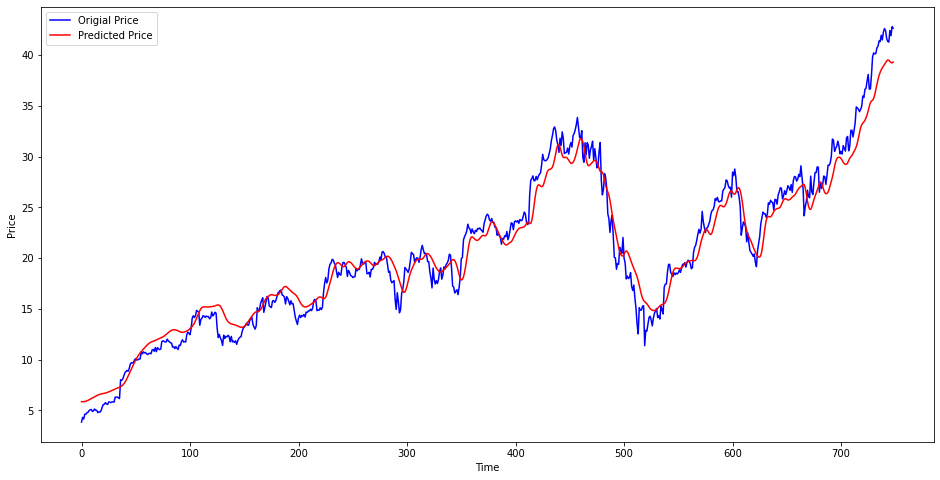

In [41]:
plt.figure(figsize=(16,8))

plt.plot(y_test, 'b',label = "Origial Price")
plt.plot(y_predicted, 'r',label = "Predicted Price")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()